# Problem Statement and Project Objective 

Dataset
https://www.kaggle.com/datasets/kartik2112/fraud-detection

## **About dataset**



## **Data set information**

This dataset contains the credit card history of many users all over the united states for a period of 3 years.

## **Content**

There are total 22 variables in which '**is_fraud**' is our target variable.

trans_date_trans_time -> Transaction time stamp,
cc_num -> Credit card number,
merchant -> merchant name,
category -> transaction category,
amt -> Transaction amount,
first -> First name of card holder,
last -> Last name of card holder,
gender -> Sex of card holder,
street -> transaction address,
city -> transaction city,
state -> transaction state,
zip -> transaction zipcode,
lat -> transaction lattitude,
long -> transaction longitude,
city_pop -> Population of the city,
job -> job of the card holder,
dob -> date of birth of card holder,
trans_num -> transaction number of transaction,
unix_time -> time in unix format,
merch_lat -> lattitude of the merchant,
merch_long -> longitude of merchant,
is_fraud -> nature of transaction (fraud or not fraud).

## **Project Objective**



*   There are daily cases of fraud not only in US but all over the world. Many of them are becoming victims of these cases nowdays.The loss which occurs on a daily basis is unimaginable.
*   In this project we will evaluate the strong related factors with the fraud transactions and those type of factors should be given special attention to.


*   This type of model would help us to decrease the fraud rate in Business.
*   The whole of this project was done in 15 days and the total number of resources used was 10.





Data Exploration Steps for all the variables. Write down your findings after every variable exploration

In [ ]:
#packages required to import data from goole drive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import seaborn as sns


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
g_drive_file_id="1MNvPcDYLKWI8WbbQYFk6yqMWcvpX3-cq"

In [ ]:
auth.authenticate_user()
gauth=GoogleAuth()
gauth.credentials=GoogleCredentials.get_application_default()
drive=GoogleDrive(gauth)
downloaded=drive.CreateFile({'id':g_drive_file_id})
downloaded.GetContentFile('fraudTest.csv')

In [ ]:
#Getting the test data
fraud_test_data=pd.read_csv("/content/fraudTest.csv")

In [ ]:
#Train data Getting
g_drive_file_id1="1iVaakheZpqG722UdY-Xknm6QfDm4HSjm"
auth.authenticate_user()
gauth=GoogleAuth()
gauth.credentials=GoogleCredentials.get_application_default()
drive=GoogleDrive(gauth)
downloaded=drive.CreateFile({'id':g_drive_file_id})
downloaded.GetContentFile('fraudTrain.csv')

In [ ]:
fraud_train_data=pd.read_csv("/content/fraudTrain.csv")

# Data Exploration and Validation


In [ ]:
fraud_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
fraud_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
#Concatinating the test and train data as one dataset, so that we can clean them in one go.
fraud_data=pd.concat([fraud_test_data,fraud_train_data])

In [ ]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111438 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1111438 non-null  int64  
 1   trans_date_trans_time  1111438 non-null  object 
 2   cc_num                 1111438 non-null  int64  
 3   merchant               1111438 non-null  object 
 4   category               1111438 non-null  object 
 5   amt                    1111438 non-null  float64
 6   first                  1111438 non-null  object 
 7   last                   1111438 non-null  object 
 8   gender                 1111438 non-null  object 
 9   street                 1111438 non-null  object 
 10  city                   1111438 non-null  object 
 11  state                  1111438 non-null  object 
 12  zip                    1111438 non-null  int64  
 13  lat                    1111438 non-null  float64
 14  long               

In [ ]:
fraud_data.shape

(1111438, 23)

In [ ]:
fraud_data.columns.values

array(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant',
       'category', 'amt', 'first', 'last', 'gender', 'street', 'city',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype=object)

In [ ]:
fraud_data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [ ]:
fraud_data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
trans_date_trans_time,2020-06-21 12:14:25,2020-06-21 12:14:33,2020-06-21 12:14:53,2020-06-21 12:15:15,2020-06-21 12:15:17,2020-06-21 12:15:37,2020-06-21 12:15:44,2020-06-21 12:15:50,2020-06-21 12:16:10,2020-06-21 12:16:11,2020-06-21 12:16:20,2020-06-21 12:16:47,2020-06-21 12:17:21,2020-06-21 12:18:27,2020-06-21 12:18:37,2020-06-21 12:18:41,2020-06-21 12:18:54,2020-06-21 12:19:50,2020-06-21 12:19:56,2020-06-21 12:20:13
cc_num,2291163933867244,3573030041201292,3598215285024754,3591919803438423,3526826139003047,30407675418785,213180742685905,3589289942931264,3596357274378601,3546897637165774,2242542703101233,571465035400,6593250708747804,4988304376504,6011504998544485,4570636521433188,4906628655840914250,4908846471916297,4861310130652566408,6538441737335434
merchant,fraud_Kirlin and Sons,fraud_Sporer-Keebler,"fraud_Swaniawski, Nitzsche and Welch",fraud_Haley Group,fraud_Johnston-Casper,fraud_Daugherty LLC,fraud_Romaguera Ltd,fraud_Reichel LLC,"fraud_Goyette, Howell and Collier",fraud_Kilback Group,"fraud_Feil, Hilpert and Koss",fraud_Gottlieb Group,fraud_Connelly-Carter,fraud_Bechtelar-Rippin,fraud_Lubowitz-Walter,"fraud_Welch, Rath and Koepp",fraud_Hickle Group,"fraud_Lang, Towne and Schuppe",fraud_Morissette LLC,fraud_Prosacco LLC
category,personal_care,personal_care,health_fitness,misc_pos,travel,kids_pets,health_fitness,personal_care,shopping_pos,food_dining,food_dining,kids_pets,home,food_dining,kids_pets,entertainment,shopping_pos,kids_pets,entertainment,personal_care
amt,2.86,29.84,41.28,60.05,3.19,19.55,133.93,10.37,4.37,66.54,7.01,42.4,2.91,7.93,2.91,24.73,2.33,16.6,80.11,5.71
first,Jeff,Joanne,Ashley,Brian,Nathan,Danielle,Kayla,Paula,David,Kayla,Samuel,Louis,Melissa,William,Ashley,Christine,Charles,Lauren,Ashley,Gina
last,Elliott,Williams,Lopez,Williams,Massey,Evans,Sutton,Estrada,Everett,Obrien,Jenkins,Fisher,Meza,Thompson,Whitney,Leblanc,Moreno,Torres,Cruz,Grimes
gender,M,F,F,M,M,F,F,F,M,F,M,M,F,M,F,F,M,F,F,F
street,351 Darlene Green,3638 Marsh Union,9333 Valentine Point,32941 Krystal Mill Apt. 552,5783 Evan Roads Apt. 465,76752 David Lodge Apt. 064,010 Weaver Land,350 Stacy Glens,4138 David Fall,7921 Robert Port Suite 343,43235 Mckenzie Views Apt. 837,45654 Hess Rest,244 Abbott Parkway,977 Rita Grove Apt. 000,4038 Smith Avenue,5097 Jodi Vista Suite 811,838 Franklin Prairie Apt. 902,03030 White Lakes,65417 Walsh Radial Suite 691,444 Robert Mews


## **Converting 'trans_details'and 'age' into date time stamp**

In [ ]:
fraud_data.trans_date_trans_time=pd.to_datetime(fraud_data.trans_date_trans_time)
fraud_data.dtypes

Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [ ]:
fraud_data.dob=pd.to_datetime(fraud_data.dob)
fraud_data.dtypes

Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [ ]:
#There is no missing data in this data set.
fraud_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
fraud_data.rename(columns={'Unnamed: 0 ':'Unnamed','trans_date_trans_time':'trans_details'},inplace=True)

In [ ]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111438 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Unnamed: 0     1111438 non-null  int64         
 1   trans_details  1111438 non-null  datetime64[ns]
 2   cc_num         1111438 non-null  int64         
 3   merchant       1111438 non-null  object        
 4   category       1111438 non-null  object        
 5   amt            1111438 non-null  float64       
 6   first          1111438 non-null  object        
 7   last           1111438 non-null  object        
 8   gender         1111438 non-null  object        
 9   street         1111438 non-null  object        
 10  city           1111438 non-null  object        
 11  state          1111438 non-null  object        
 12  zip            1111438 non-null  int64         
 13  lat            1111438 non-null  float64       
 14  long           1111438 non-null  fl

In [ ]:
fraud_data.drop(fraud_data.columns[0],axis=1,inplace=True)

In [ ]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111438 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   trans_details  1111438 non-null  datetime64[ns]
 1   cc_num         1111438 non-null  int64         
 2   merchant       1111438 non-null  object        
 3   category       1111438 non-null  object        
 4   amt            1111438 non-null  float64       
 5   first          1111438 non-null  object        
 6   last           1111438 non-null  object        
 7   gender         1111438 non-null  object        
 8   street         1111438 non-null  object        
 9   city           1111438 non-null  object        
 10  state          1111438 non-null  object        
 11  zip            1111438 non-null  int64         
 12  lat            1111438 non-null  float64       
 13  long           1111438 non-null  float64       
 14  city_pop       1111438 non-null  in

In [ ]:
print(fraud_data['gender'].value_counts())
print(fraud_data['state'].value_counts())

F    609772
M    501666
Name: gender, dtype: int64
TX    80786
NY    71836
PA    68652
CA    48270
OH    40294
MI    39342
IL    37920
FL    36208
AL    35064
MO    33002
MN    27438
AR    26968
NC    25736
SC    25082
KY    25012
VA    25012
WI    24740
IN    23918
IA    23638
OK    22758
GA    22554
MD    22304
WV    21676
NJ    21056
NE    20514
KS    19886
LA    17976
MS    17666
WY    16908
WA    16232
OR    15622
TN    14718
NM    14040
ME    13856
ND    12794
CO    11772
SD    10500
MA    10372
MT    10104
VT    10088
UT     9316
AZ     9184
NH     6898
CT     6554
ID     4980
NV     4902
DC     3034
HI     2180
AK     1686
RI      390
Name: state, dtype: int64


0    1107148
1       4290
Name: is_fraud, dtype: int64


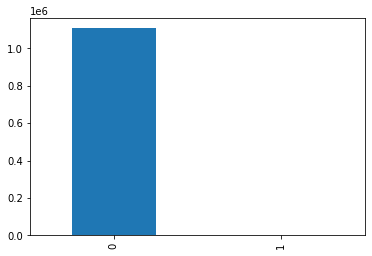

In [ ]:
print(fraud_data['is_fraud'].value_counts())
fraud_data['is_fraud'].value_counts().plot.bar()

From this analysis it was concluded that the data needs to balanced and then worked upon.(As there are huge number of counts which are not fraud)

In [ ]:
import plotly.express as px
plt.figure(figsize=(20,20))
corr=fraud_data.corr().round(1)
fig = px.imshow(corr)
fig.show()


<Figure size 1440x1440 with 0 Axes>

Plotting a Heatmap out of the data will show us the how strong corelation exist between the categories and the target variable.

# Data Cleaning and Data Preparation

Write down Outlier treatment and missing value treatment code

## **Data cleaning for 'amt'**

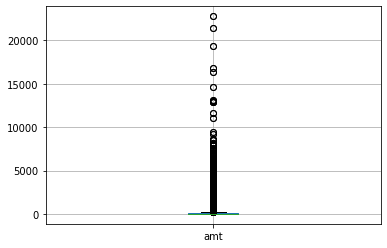

In [ ]:
boxplot=fraud_data.boxplot('amt')

From the Box plot outlier were detected just seeeing the plot for it. To get a confirmation of this **quantile** was used in the next step.

In [ ]:
x_percentiles=fraud_data['amt'].quantile([0,0.05,0.1,0.25,0.5,0.75,0.8,0.9,0.93,0.96,0.99,1])
round(x_percentiles,2)

0.00        1.00
0.05        2.43
0.10        4.08
0.25        9.63
0.50       47.29
0.75       83.01
0.80       94.40
0.90      135.55
0.93      162.74
0.96      210.08
0.99      519.86
1.00    22768.11
Name: amt, dtype: float64

In [ ]:
fraud_data.loc[fraud_data['amt']>520,'amt']=fraud_data['amt'].median()

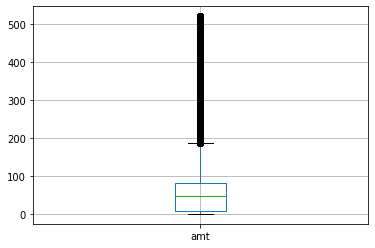

In [ ]:
x_percentiles=fraud_data['amt'].quantile([0,0.05,0.1,0.25,0.5,0.75,0.8,0.9,0.93,0.96,0.99,1])
round(x_percentiles,2)
boxplot=fraud_data.boxplot('amt')

In [ ]:
#Let us copy the following data to a new data set for further analysis.
fraud_data_new=fraud_data.copy(deep=True)
fraud_data_new.head()

,trans_details,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
fraud_data_new1=fraud_data_new.sample(frac=0.05)

In this step 5% of the whole data was selected to work upon.
Note- This was done to avoid the Goggle Colab system fail.

In [ ]:
#Checking the size of new dataset
fraud_data_new1.shape

(55572, 22)

In [ ]:
fraud_data_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55572 entries, 216685 to 192733
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   trans_details  55572 non-null  datetime64[ns]
 1   cc_num         55572 non-null  int64         
 2   merchant       55572 non-null  object        
 3   category       55572 non-null  object        
 4   amt            55572 non-null  float64       
 5   first          55572 non-null  object        
 6   last           55572 non-null  object        
 7   gender         55572 non-null  object        
 8   street         55572 non-null  object        
 9   city           55572 non-null  object        
 10  state          55572 non-null  object        
 11  zip            55572 non-null  int64         
 12  lat            55572 non-null  float64       
 13  long           55572 non-null  float64       
 14  city_pop       55572 non-null  int64         
 15  job          

# **Featured Engineering**

In the start of featured engineering itself the customer Dob, transaction year, transaction week, transaction hour will be derived from the timestamp datatype which we have in our data set.

In [ ]:
# deriving additonal columns from 'trans_date_trans_time'
#deriving hour
fraud_data_new1['trans_hour'] = fraud_data_new1['trans_details'].dt.hour
#deriving 'day of the week'
fraud_data_new1['trans_day_of_week'] = fraud_data_new1['trans_details'].dt.day_name()
#deriving 'year_month'
fraud_data_new1['trans_year_month'] = fraud_data_new1['trans_details'].dt.to_period('M')

In [ ]:
fraud_data_new1.shape

(55572, 25)

In [ ]:
#finding age
fraud_data_new1['age'] = np.round((fraud_data_new1['trans_details'] - 
                      fraud_data_new1['dob'])/np.timedelta64(1, 'Y'))
fraud_data_new1.age.head()

216685    52.0
297007    30.0
200927    48.0
534867    34.0
332587    40.0
Name: age, dtype: float64

In [ ]:
fraud_data_new1.head(10)

,trans_details,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,trans_year_month,age
216685,2020-09-06 12:23:12,6573561108825071,fraud_Crona and Sons,kids_pets,44.56,Kristina,Lewis,F,5449 Brandi Heights Apt. 111,Tulsa,...,1968-06-18,9b14b44855366649cee5d3e8b85da5c3,1378470192,35.547943,-95.531015,0,12,Sunday,2020-09,52.0
297007,2020-10-11 14:10:32,4822367783500458,fraud_Morissette LLC,entertainment,28.83,Christopher,Farrell,M,97070 Anderson Land,Haines City,...,1991-01-01,2686541e959e56724924f3e329aaf197,1381500632,28.735373,-81.220985,0,14,Sunday,2020-10,30.0
200927,2020-08-31 02:30:11,180094419304907,fraud_Kuphal-Bartoletti,misc_net,24.06,Sharon,Smith,F,17666 David Valleys,Sun City,...,1972-09-22,7c6953644395bff8c85e14b5d32dfa26,1377916211,33.850349,-116.588643,0,2,Monday,2020-08,48.0
534867,2020-12-27 16:43:59,4653178848915023204,"fraud_Parker, Nolan and Trantow",entertainment,226.04,Robert,Hall,M,371 Anthony Trail Suite 354,Glade Spring,...,1987-04-29,d3656bf4d16dc27a5a3d64ae177aa836,1388162639,37.253381,-81.538928,0,16,Sunday,2020-12,34.0
332587,2020-10-26 18:16:52,4469777115158234880,fraud_Quitzon-Goyette,home,16.99,Gregory,Graham,M,4005 Dana Glens,Methuen,...,1980-11-22,561ad83bbcdd8c01e9d46126776ba60f,1382811412,43.289276,-70.839745,0,18,Monday,2020-10,40.0
371394,2020-11-12 18:59:54,571365235126,fraud_Hudson-Grady,shopping_pos,1.60,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,Elberta,...,1995-07-12,8490d86d0d279242efed77a48abeed59,1384282794,44.352729,-85.981312,0,18,Thursday,2020-11,25.0
234093,2020-09-13 21:15:48,4364010865167176,"fraud_Jones, Sawayn and Romaguera",misc_net,26.78,Gary,Martinez,M,03512 Jackson Ports,Reno,...,1997-03-12,16503fef391f641d03414c81af5b4ad7,1379106948,38.636481,-120.530124,0,21,Sunday,2020-09,24.0
453564,2020-12-08 22:07:51,6538441737335434,fraud_Auer-Mosciski,grocery_pos,36.96,Gina,Grimes,F,444 Robert Mews,Clarks Mills,...,1997-09-22,59d904f6fb518963407d2ee50340fed8,1386540471,41.540453,-79.658305,0,22,Tuesday,2020-12,23.0
396664,2020-11-23 20:47:17,581686439828,fraud_Kulas Group,health_fitness,95.43,Larry,House,M,911 Sabrina Trafficway,Cochranton,...,1973-07-28,3fb9d7676f9b6ecf547625339f6742c3,1385239637,41.542013,-80.514905,0,20,Monday,2020-11,47.0
440848,2020-12-06 21:39:24,4428154703770710,fraud_Botsford and Sons,home,46.99,Brittany,Guerra,F,79209 Gary Dale,Colton,...,1943-06-30,d08b45f6044a4eb5015f951beee9b9bb,1386365964,46.580722,-117.191971,0,21,Sunday,2020-12,77.0


In [ ]:
print(fraud_data_new1.dtypes)
print(fraud_data_new1.shape)

trans_details        datetime64[ns]
cc_num                        int64
merchant                     object
category                     object
amt                         float64
first                        object
last                         object
gender                       object
street                       object
city                         object
state                        object
zip                           int64
lat                         float64
long                        float64
city_pop                      int64
job                          object
dob                  datetime64[ns]
trans_num                    object
unix_time                     int64
merch_lat                   float64
merch_long                  float64
is_fraud                      int64
trans_hour                    int64
trans_day_of_week            object
trans_year_month          period[M]
age                         float64
dtype: object
(55572, 26)


Since some of the features such as the customer Name, Credit Card number and Transaction number are not that important it can be dropped before the model bulinding is done.


In [ ]:
fraud_data_new1.drop([ 'cc_num','first','last', 'trans_num'], axis=1, inplace=True)
print(fraud_data_new1.shape)
fraud_data_new1.columns

(55572, 22)


Index(['trans_details', 'merchant', 'category', 'amt', 'gender', 'street',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'trans_hour',
       'trans_day_of_week', 'trans_year_month', 'age'],
      dtype='object')

In [ ]:
print(fraud_data_new1.shape)
print(fraud_data_new1.dtypes)

(55572, 22)
trans_details        datetime64[ns]
merchant                     object
category                     object
amt                         float64
gender                       object
street                       object
city                         object
state                        object
zip                           int64
lat                         float64
long                        float64
city_pop                      int64
job                          object
dob                  datetime64[ns]
unix_time                     int64
merch_lat                   float64
merch_long                  float64
is_fraud                      int64
trans_hour                    int64
trans_day_of_week            object
trans_year_month          period[M]
age                         float64
dtype: object


Before performing OHE of discreate data types let us take a look at the number of unique values on each column just to get idea on the complexity of the featured engineering process.

In [ ]:
print(fraud_data_new1.state.nunique())
print(fraud_data_new1.street.nunique())
print(fraud_data_new1.city.nunique())
print(fraud_data_new1.job.nunique())
print(fraud_data_new1.merchant.nunique())
print(fraud_data_new1.category.nunique())

50
917
844
477
693
14


From the above count of the unique values it can be seen that there are lot of unique values in the above 5 columns. So this should be dropped in order to keep our model simple. Else One Hot encoding these categorical variable would form a lot of bins. Also after dropping we will be having more than 15 columns for our model building.

In [ ]:
fraud_data_new1.drop(['merchant','street','city','state','job'],axis=1, inplace=True)
          
          

In [ ]:
fraud_data_new1.shape

(55572, 17)

In [ ]:
print(fraud_data_new1.dtypes)

trans_details        datetime64[ns]
category                     object
amt                         float64
gender                       object
zip                           int64
lat                         float64
long                        float64
city_pop                      int64
dob                  datetime64[ns]
unix_time                     int64
merch_lat                   float64
merch_long                  float64
is_fraud                      int64
trans_hour                    int64
trans_day_of_week            object
trans_year_month          period[M]
age                         float64
dtype: object


## **One-Hot Encoding of categorical variables**

In [ ]:
#one-hot encoding the category variable
category_onehot = pd.get_dummies(fraud_data_new1.category, prefix='category', drop_first=True)
#one-hot encoding the gender variable
gender_onehot = pd.get_dummies(fraud_data_new1.gender, prefix='gender', drop_first=True)
#one-hot encoding the day_of_week variable
day_of_week_onehot = pd.get_dummies(fraud_data_new1.trans_day_of_week, prefix='day', drop_first=True)


In [ ]:
fraud_ohe = pd.concat([fraud_data_new1, category_onehot,gender_onehot,day_of_week_onehot], axis=1)
fraud_ohe.head()

,trans_details,category,amt,gender,zip,lat,long,city_pop,dob,unix_time,...,category_shopping_net,category_shopping_pos,category_travel,gender_M,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
216685,2020-09-06 12:23:12,kids_pets,44.56,F,74130,36.2395,-95.9596,413574,1968-06-18,1378470192,...,0,0,0,0,0,0,1,0,0,0
297007,2020-10-11 14:10:32,entertainment,28.83,M,33844,28.0758,-81.5929,33804,1991-01-01,1381500632,...,0,0,0,1,0,0,1,0,0,0
200927,2020-08-31 02:30:11,misc_net,24.06,F,92585,33.7467,-117.1721,54287,1972-09-22,1377916211,...,0,0,0,0,1,0,0,0,0,0
534867,2020-12-27 16:43:59,entertainment,226.04,M,24340,36.7779,-81.7676,5657,1987-04-29,1388162639,...,0,0,0,1,0,0,1,0,0,0
332587,2020-10-26 18:16:52,home,16.99,M,1844,42.7280,-71.1810,47249,1980-11-22,1382811412,...,0,0,0,1,1,0,0,0,0,0


In [ ]:
print(fraud_ohe.columns)
print(fraud_ohe.shape)

Index(['trans_details', 'category', 'amt', 'gender', 'zip', 'lat', 'long',
       'city_pop', 'dob', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'trans_hour', 'trans_day_of_week', 'trans_year_month', 'age',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday'],
      dtype='object')
(55572, 37)


In [ ]:
#Drop the category gender and day_of_weak variable as they are already OHC.
fraud_ohe.drop(['category','gender','trans_day_of_week'],axis=1, inplace=True)

In [ ]:
print(fraud_ohe.shape)

(55572, 34)


In [ ]:
#Copying the OHE datatype into another dataset so that we can work on that and the original data can be refered when required.
fraud_ohe1 = fraud_ohe.copy(deep = True)

Before Binning the continous variable like age and amt let us take this 
data and build a model.
The latitude and logitude parameters will be dropped and taken care again in the coming section of the project.

In [ ]:
fraud_ohe1.drop(['zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat','merch_long'],axis=1, inplace=True)

We should also be dropping the trans_details and trans_year_month as we have already got the valuable information from these columns

In [ ]:
fraud_ohe1.drop(['trans_details','trans_year_month'],axis=1, inplace=True)


In [ ]:
#Dropping the Dob part as we have got the age from that.
fraud_ohe1.drop(['dob'],axis=1,inplace=True)

In [ ]:
fraud_ohe1.dtypes

amt                        float64
is_fraud                     int64
trans_hour                   int64
age                        float64
category_food_dining         uint8
category_gas_transport       uint8
category_grocery_net         uint8
category_grocery_pos         uint8
category_health_fitness      uint8
category_home                uint8
category_kids_pets           uint8
category_misc_net            uint8
category_misc_pos            uint8
category_personal_care       uint8
category_shopping_net        uint8
category_shopping_pos        uint8
category_travel              uint8
gender_M                     uint8
day_Monday                   uint8
day_Saturday                 uint8
day_Sunday                   uint8
day_Thursday                 uint8
day_Tuesday                  uint8
day_Wednesday                uint8
dtype: object

# **Model Building**

## **Logistic Regression Model**

In [ ]:
# Creating X array that will contain features and y array will contain the target vector
X=fraud_ohe1.drop('is_fraud',axis=1)
y=fraud_ohe1['is_fraud']

# Importing the package
from sklearn.model_selection import train_test_split

# Using train_test_split() function to split the whole data to train data of 80% and test data of 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Checking the shapes of the train and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (44457, 23)
X_test (11115, 23)
y_train (44457,)
y_test (11115,)


In [ ]:
# Importing the Library
from sklearn.linear_model import LogisticRegression

logistic=LogisticRegression(max_iter=2000)


# Building a Multiple Logistic Regression Model by fitting the target and the features
logistic.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [ ]:
# Coefficient and intercept
print(logistic.coef_)
print(logistic.intercept_)

[[ 0.00605315  0.10012968  0.01625135 -0.14445636  0.95702348  1.31763036
   2.00936218 -0.48904151 -0.7058558  -0.40114606  1.61651089 -0.19363533
  -0.91387991  1.77830899  1.03536329 -0.40136669  0.19306976 -0.14637169
  -0.05365749  0.05250921  0.09067368 -0.31005357  0.05712327]]
[-8.80587626]


In [ ]:
# Prediction of target using the features
pred=logistic.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

### **Model Validation**

In [ ]:
# Importing the sklearn package for creating the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
cm

array([[11074,     0],
       [   41,     0]])

In [ ]:
# Calculating the accuracy of the model
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
round(accuracy*100,3)

99.631

Note- Although the accuracy comes out to be very high this accuracy can be deceptive due to the class imbalance we had. So we will treat this class imbalance using Under Sampling and oversampling and SMOTE technique in further Section.

### **Checking Multicolinearity**

In [ ]:
# Importing the package
import statsmodels.formula.api as sm
# Creating function for calculating VIF
def vif_cal(input_data):
    x_vars = input_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
# Calculating VIF for all the Features
vif_cal(input_data=X_train)

amt  VIF =  1.1
trans_hour  VIF =  2.1
age  VIF =  1.09
category_food_dining  VIF =  1.84
category_gas_transport  VIF =  2.55
category_grocery_net  VIF =  1.61
category_grocery_pos  VIF =  2.46
category_health_fitness  VIF =  1.8
category_home  VIF =  2.1
category_kids_pets  VIF =  2.03
category_misc_net  VIF =  1.73
category_misc_pos  VIF =  1.82
category_personal_care  VIF =  1.87
category_shopping_net  VIF =  1.94
category_shopping_pos  VIF =  2.09
category_travel  VIF =  1.4
gender_M  VIF =  1.01
day_Monday  VIF =  2.22
day_Saturday  VIF =  1.75
day_Sunday  VIF =  2.04
day_Thursday  VIF =  1.71
day_Tuesday  VIF =  2.18
day_Wednesday  VIF =  1.65


From the VIF it is clearly seen that none of the features are interdepent on each other. So we need not drop any of them. Now let's Check the P-vale to check their impact and drop the non impactfull variables.

### **Checking the Individual Impact of Variables**

In [ ]:
# Importing the statsmodel library
import statsmodels.discrete.discrete_model as sm
m=sm.Logit(y,X)
# Fitting feature to the model
Res=m.fit()
# Printing Summary
print(Res.summary())

Optimization terminated successfully.
         Current function value: 0.028121
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:                55572
Model:                          Logit   Df Residuals:                    55549
Method:                           MLE   Df Model:                           22
Date:                Wed, 03 Aug 2022   Pseudo R-squ.:                -0.05937
Time:                        04:16:30   Log-Likelihood:                -1562.7
converged:                       True   LL-Null:                       -1475.1
Covariance Type:            nonrobust   LLR p-value:                     1.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
amt                         0.0034      0.001      5.354      0.000       0.002  

From the result it was concluded that all the features were impactfull. So none of them will be dropped.

### Confusion Matrix,Accuracy,Sensitivity,Specificity

In [ ]:
# Creating confusion matrix
cm=confusion_matrix(y_test,pred)
cm
# Calculating Accuracy
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy=',round(accuracy*100,3))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

Accuracy= 99.631
Sensitivity- 100.0
Specificity- 0.0


From the Specificity it can be concluded that there is a huge class imbalance present in the data.

# **Model Selection and Cross Validation**

In [ ]:
X=fraud_ohe1.drop('is_fraud',axis=1)
y=fraud_ohe1['is_fraud']

In [ ]:
# Importing the statsmodel library
import statsmodels.discrete.discrete_model as sm
m=sm.Logit(y,X)
# Fitting feature to the model
results=m.fit()
# Printing Summary
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.028121
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:                55572
Model:                          Logit   Df Residuals:                    55549
Method:                           MLE   Df Model:                           22
Date:                Wed, 03 Aug 2022   Pseudo R-squ.:                -0.05937
Time:                        04:17:12   Log-Likelihood:                -1562.7
converged:                       True   LL-Null:                       -1475.1
Covariance Type:            nonrobust   LLR p-value:                     1.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
amt                         0.0034      0.001      5.354      0.000       0.002  

In [ ]:
# Predict the traget using the features
predict1=results.predict()

## Confusion Matrix,Accuracy,Sensitivity,Specificity

In [ ]:
# Taking the threshold value 0.5 as it is logistic regression
threshold=0.5
predictions1=[ 0 if x < threshold else 1 for x in predict1]

# Confusion Matrix and Accuracy
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y,predictions1)
print(cm)

total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy=',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[55345     0]
 [  227     0]]
Accuracy= 99.59
Sensitivity- 100.0
Specificity- 0.0


# **Handling Class imbalance**

## **ROC Curve**

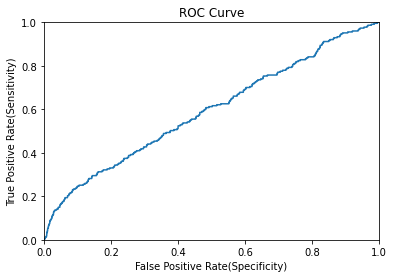

In [ ]:
# Importing the roc_curve,auc
from sklearn.metrics import roc_curve,auc,accuracy_score

fpr, tpr, thresholds = roc_curve(y,predict1)

# Drawing ROC_Curve
plt.plot(fpr,tpr)
plt.title('ROC Curve')
#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels 
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

Just by looking as the ROC curve there was no clear evident of the threshold as the graph turned out be quite linear.

## **Area Under Curve (AUC)**

In [ ]:
auc(fpr,tpr)
# The AUC should be value higher for a better model

0.5927956912646065

## **Updated Accuracy, Sensitivity and Specificity**

In [ ]:
# Choosing thershold of 0.2 as the optimum value for better accuracy. This was also done as for us class-1 is important.
threshold2=0.2
predictions2=[ 0 if x < threshold2 else 1 for x in predict1]

# Creating confusion matrix
cm=confusion_matrix(y,predictions2)
print(cm)

# Calculating Accuracy
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy-',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[55343     2]
 [  227     0]]
Accuracy- 99.59
Sensitivity- 100.0
Specificity- 0.0


Even after changing the threshold there was no improvent in specificity.

## **Precision,Recall and F1 Score**

In [ ]:
# Importing classification report from sklearn library
from sklearn.metrics import classification_report
print(classification_report(y,predictions1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55345
           1       0.00      0.00      0.00       227

    accuracy                           1.00     55572
   macro avg       0.50      0.50      0.50     55572
weighted avg       0.99      1.00      0.99     55572



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## **Oversampling and under sampling**

In [ ]:
freq=fraud_ohe1['is_fraud'].value_counts()
print(freq)
print((freq/freq.sum())*100)

0    55345
1      227
Name: is_fraud, dtype: int64
0    99.591521
1     0.408479
Name: is_fraud, dtype: float64


In [ ]:
# Oversampling of minority class
# Lets increase the size by 40 times. Increasing the size of minor class to 40 times was important as it was very less in number.
df=fraud_ohe1[fraud_ohe1['is_fraud']==1]
df_oversample=df.sample(40*len(df),replace=True)
df_oversample.shape

(9080, 24)

In [ ]:
# Undersampling the majority class
## Considering 40% of class-0
df1=fraud_ohe1[fraud_ohe1['is_fraud']==0]
df_undersample=df1.sample(int(0.5*len(df1)))
df_undersample.shape

(27672, 24)

In [ ]:
# Concatenating both undersample data and oversample data to create a balanced dataset
fraud_ohe1b=pd.concat([df_oversample,df_undersample])
fraud_ohe1b.shape

(36752, 24)

In [ ]:
# Chceking the percentage of balanced data after oversampling and undersampling
freq=fraud_ohe1b['is_fraud'].value_counts()
print((freq/freq.sum())*100)

0    75.293862
1    24.706138
Name: is_fraud, dtype: float64


### **Updated Sensitivity and Specificity**

In [ ]:
## Function for OLS formula
def ols_formula(df, dependent_var, *excluded_cols):
    '''
    Generates the y~X style formula for statsmodels (patsy) given
    the dataframe, dependent variable and optional excluded columns
    as strings
    '''
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

In [ ]:
model_formula=ols_formula(fraud_ohe1b.iloc[:,1:], dependent_var="is_fraud")
print(model_formula)

is_fraud ~ trans_hour + age + category_food_dining + category_gas_transport + category_grocery_net + category_grocery_pos + category_health_fitness + category_home + category_kids_pets + category_misc_net + category_misc_pos + category_personal_care + category_shopping_net + category_shopping_pos + category_travel + gender_M + day_Monday + day_Saturday + day_Sunday + day_Thursday + day_Tuesday + day_Wednesday


In [ ]:
import statsmodels.formula.api as sm

risk_model=sm.logit(model_formula, data=fraud_ohe1b)
results=risk_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.470454
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:                36752
Model:                          Logit   Df Residuals:                    36729
Method:                           MLE   Df Model:                           22
Date:                Wed, 03 Aug 2022   Pseudo R-squ.:                  0.1585
Time:                        04:20:47   Log-Likelihood:                -17290.
converged:                       True   LL-Null:                       -20547.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -4.3154      0.122    -35.346      0.000      -4.555   

In [ ]:
# Predicting the probability of predictor 
predict_balanced=results.predict()
predict_balanced

array([0.43389806, 0.32959514, 0.5708864 , ..., 0.18171353, 0.08378127,
       0.1430901 ])

In [ ]:
# Choosing thershold of 0.5 as it is a Logistic regression Model
threshold1=0.5
predictions1=[ 0 if x < threshold1 else 1 for x in predict_balanced]

# Creating confusion matrix
cm=confusion_matrix(fraud_ohe1b['is_fraud'],predictions1)
print(cm)

# Calculating Accuracy
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy-',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[25887  1785]
 [ 6149  2931]]
Accuracy- 78.41
Sensitivity- 93.55
Specificity- 32.28


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(fraud_ohe1b["is_fraud"],predictions1))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     27672
           1       0.62      0.32      0.42      9080

    accuracy                           0.78     36752
   macro avg       0.71      0.63      0.65     36752
weighted avg       0.76      0.78      0.76     36752



There was a clear lift in specificity with the balanced data set which was made using Under and Over sampling Techniques. Now let us move forward with another way of treating imbalanced data set called SMOTE.

## **SMOTE Technique**



  






*   SMOTE is an algorithm that performs data augmentation by creating 
synthetic data points based on the original data points. SMOTE can be seen as an advanced version of oversampling, or as a specific algorithm for data augmentation. The advantage of SMOTE is that you are not generating duplicates, but rather creating synthetic data points that are slightly different from the original data points.













In [ ]:
X=fraud_ohe1.drop('is_fraud',axis=1)
y=fraud_ohe1['is_fraud']

# Importing imblearn library for importing SMOTE Function
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy=0.9,random_state=32)
X_train_smote,y_train_smote=smote.fit_resample(X,y)

# Getting the collection of counts of each class
import collections
print("Before_Smote",collections.Counter(y))
print("After_Smote",collections.Counter(y_train_smote))

Before_Smote Counter({0: 55345, 1: 227})
After_Smote Counter({0: 55345, 1: 49810})


In [ ]:
# Creating a new dataset having the balanced data
fraud_ohe1_smote=X_train_smote
fraud_ohe1_smote['is_fraud']=y_train_smote
fraud_ohe1_smote.head()

,amt,trans_hour,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,...,category_shopping_pos,category_travel,gender_M,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,is_fraud
0,44.56,12,52.0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,28.83,14,30.0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,24.06,2,48.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,226.04,16,34.0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,16.99,18,40.0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0


In [ ]:
freq=fraud_ohe1_smote['is_fraud'].value_counts()
print((freq/freq.sum())*100)

0    52.631829
1    47.368171
Name: is_fraud, dtype: float64


### **Sensitivity and Specificity after SMOTE using Stats model**

In [ ]:
## Function for OLS formula
def ols_formula(df, dependent_var, *excluded_cols):
    '''
    Generates the y~X style formula for statsmodels (patsy) given
    the dataframe, dependent variable and optional excluded columns
    as strings
    '''
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

## Function Calling
model_formula=ols_formula(fraud_ohe1_smote.iloc[:,1:], dependent_var="is_fraud")
print(model_formula)

is_fraud ~ trans_hour + age + category_food_dining + category_gas_transport + category_grocery_net + category_grocery_pos + category_health_fitness + category_home + category_kids_pets + category_misc_net + category_misc_pos + category_personal_care + category_shopping_net + category_shopping_pos + category_travel + gender_M + day_Monday + day_Saturday + day_Sunday + day_Thursday + day_Tuesday + day_Wednesday


In [ ]:
import statsmodels.formula.api as sm

# Building Statistical Logistic Regression Model
m=sm.logit(model_formula,data=fraud_ohe1_smote)

results=m.fit()

# Printing the result summary
print(results.summary())

pred_smote = results.predict()

Optimization terminated successfully.
         Current function value: 0.291347
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:               105155
Model:                          Logit   Df Residuals:                   105132
Method:                           MLE   Df Model:                           22
Date:                Wed, 03 Aug 2022   Pseudo R-squ.:                  0.5788
Time:                        04:24:09   Log-Likelihood:                -30637.
converged:                       True   LL-Null:                       -72742.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   3.6567      0.048     76.630      0.000       3.563   

In [ ]:
# Choosing thershold of 0.5 for Logistic Regression
threshold4=0.5
predictions4=[ 0 if x < threshold4 else 1 for x in pred_smote]

from sklearn.metrics import confusion_matrix

# Creating confusion matrix
cm=confusion_matrix(fraud_ohe1_smote['is_fraud'],predictions4)
print(cm)

# Calculating Accuracy
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy-',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[49486  5859]
 [ 6289 43521]]
Accuracy- 88.45
Sensitivity- 89.41
Specificity- 87.37


Here there is a very good rise in the specificity which we aimed at and there is also not much compromise in the over all accuracy. (Accuracy over 80% is good from any business point of view)

### **Specificity and Sesitivity using Sklearn**

In [ ]:
X=fraud_ohe1_smote.drop('is_fraud',axis=1)
y=fraud_ohe1_smote['is_fraud']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

logistic=LogisticRegression(solver='newton-cg',max_iter=200)
# Fitting the target and the features
logistic.fit(X_train,y_train)

#predict
pred1_smote=logistic.predict(X_train)

In [ ]:
# Creating confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_train,pred1_smote)
print(cm)

# Calculating Accuracy
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy-',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[39488  4752]
 [ 5013 34871]]
Accuracy- 88.39
Sensitivity- 89.26
Specificity- 87.43


**Checking for overfitting and underfitting**

In [ ]:
pred2_smote=logistic.predict(X_test)
# Creating confusion matrix
cm1=confusion_matrix(y_test,pred2_smote)
print(cm1)

# Calculating Train Accuracy
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Train Accuracy-',round(accuracy*100,2))

# Calculating Test Accuracy
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print('Test Accuracy-',round(accuracy1*100,2))

[[9939 1166]
 [1290 8636]]
Train Accuracy- 88.39
Test Accuracy- 88.32


There is almost negligible difference between the Test and Train result. So the it is okay.

# **Decision Tree Model**

In [ ]:
# Creating X array that will contain features and y array will contain the target vector
X=fraud_ohe1_smote.drop('is_fraud',axis=1)
y=fraud_ohe1_smote['is_fraud']

# Importing the package
from sklearn.model_selection import train_test_split

# Using train_test_split() function to split the whole data to train data of 80% and test data of 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Checking the shapes of the train and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (78866, 23)
X_test (26289, 23)
y_train (78866,)
y_test (26289,)


In [ ]:
#Building Tree Model
from sklearn.tree import DecisionTreeClassifier

# Instantiating the DecisionTreeClassifier and keeping the max_depth as 8(choosen by fine tuning the pruning parameter) for optimal IGV
DTree = DecisionTreeClassifier(max_depth=8)

# Building a Decision Tree Model by fitting the train target and the train features
DTree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8)

|--- trans_hour <= 21.50
|   |--- trans_hour <= 2.50
|   |   |--- amt <= 252.37
|   |   |   |--- amt <= 47.30
|   |   |   |   |--- amt <= 6.82
|   |   |   |   |   |--- category_gas_transport <= 0.50
|   |   |   |   |   |   |--- age <= 39.59
|   |   |   |   |   |   |   |--- age <= 38.01
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- age >  38.01
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- age >  39.59
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- category_gas_transport >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- amt >  6.82
|   |   |   |   |   |--- category_misc_pos <= 0.50
|   |   |   |   |   |   |--- age <= 71.97
|   |   |   |   |   |   |   |--- day_Saturday <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- day_Saturday >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- age >  71.97
|   |   |   |   |   |   |   |

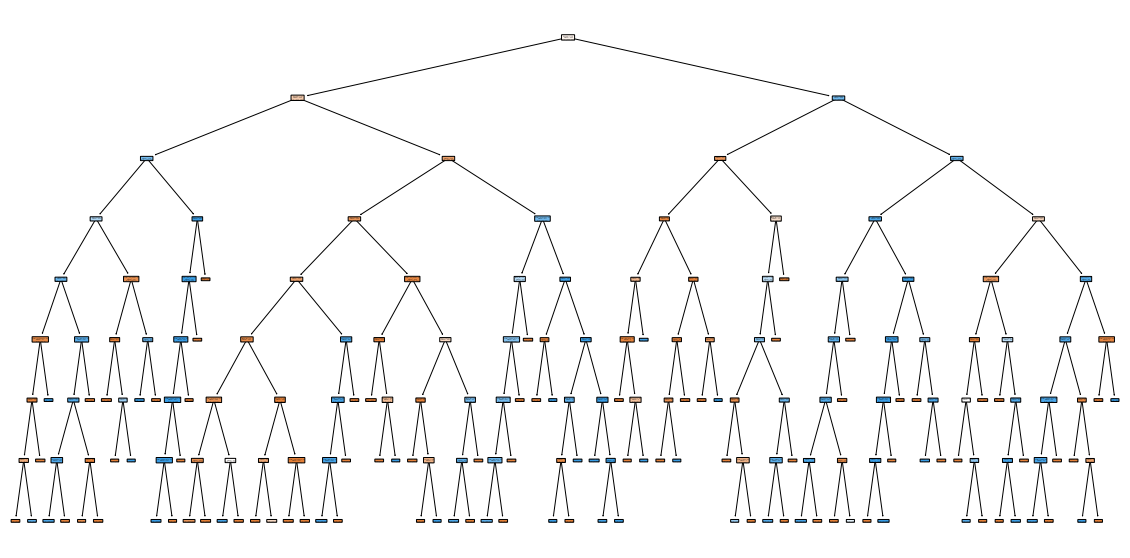

In [ ]:
#Plotting the trees 
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree,export_text
plt.figure(figsize=(20,10))
plot_tree(DTree, filled=True,rounded=True,impurity=False,feature_names=list(X_train.columns))
print(export_text(DTree,feature_names=list(X_train.columns)))

In [ ]:
# Predicting the target using the test data features
pred_dtree=DTree.predict(X_test)
pred_dtree

array([1, 0, 0, ..., 1, 0, 1])

## **Model Validation**

In [ ]:
# Importing confusion_matrix
from sklearn.metrics import confusion_matrix

# Creating Confusion Matrix using the test data and the predicted value
cm=confusion_matrix(y_test,pred_dtree)
print(cm)

# Calculating the accuracy of the predicted value of the test data
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy=',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[13444   495]
 [  459 11891]]
Accuracy= 96.37
Sensitivity- 96.45
Specificity- 96.28


## **Check of Overfitting and underfitting**

In [ ]:
# Predicting the target using the train data features
pred_dtree1=DTree.predict(X_train)

# Creating Confusion matrix using the train data and the predicted value
cm1=confusion_matrix(y_train,pred_dtree1)
print(cm1)

# Calculating the accuracy of the train data
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print('Train Accuracy=',round(accuracy1*100,2))

# Calculating the accuracy of the test data
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Test Accuracy=',round(accuracy*100,2))

[[40017  1389]
 [ 1239 36221]]
Train Accuracy= 96.67
Test Accuracy= 96.37




*   Sometimes usually when there are lot of data points present in the dataset the model may memorise both the test and train data behaviour. So to theck upon this K-Fold validation is done.




## **K-Fold Cross Validation**



*   In k-fold cross-validation, we make an assumption that all observations in the dataset are nicely distributed in a way that the data are not biased.




In [ ]:
#Simple K-Fold cross validation. 10 folds.
from sklearn.model_selection import KFold
kfold_models = KFold(n_splits=10)

from sklearn import model_selection
scores = model_selection.cross_val_score(DTree,X, y,cv=kfold_models)
print(scores)
print("Avg K-Fold Accuracy", scores.mean())

[0.95977558 0.96034614 0.95958539 0.94484595 0.95910993 0.96376605
 0.95520685 0.92990965 0.94655254 0.94588683]
Avg K-Fold Accuracy 0.952498491079508


# **Advanced Machine Learning Algorithms**

## **Random Forest**

### **Random Forest Model building**

In [ ]:
import time

In [ ]:
X=fraud_ohe1_smote.drop('is_fraud',axis=1)
y=fraud_ohe1_smote['is_fraud']

# Importing the package
from sklearn.model_selection import train_test_split

# Using train_test_split() function to split the whole data to train data of 80% and test data of 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

from sklearn.ensemble import RandomForestClassifier

start_time = time.time()

forest=RandomForestClassifier(n_estimators=100,max_features=7,max_depth=10,random_state=42)

forest.fit(X_train,y_train)

prediction=forest.predict(X_train)

print("Time taken by Random Forest "+ str((time.time() - start_time))+ " Seconds")

Time taken by Random Forest 9.702592134475708 Seconds


### **Confusion Matrix,Accuracy,Sensitivity and Specificity**

In [ ]:
# Importing confusion_matrix
from sklearn.metrics import confusion_matrix

# Creating Confusion Matrix using the test data and the predicted value
cm=confusion_matrix(y_train,prediction)
print(cm)

# Calculating the accuracy of the predicted value of the test data
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy=',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[43647   516]
 [ 1361 38600]]
Accuracy= 97.77
Sensitivity- 98.83
Specificity- 96.59


In [ ]:
# Predicting the target using the test data features
prediction1=forest.predict(X_test)

# Creating Confusion matrix using the test data and the predicted value
cm1=confusion_matrix(y_test,prediction1)
print(cm1)

# Calculating the accuracy of the train data
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Train Accuracy=',round(accuracy*100,2))

# Calculating the accuracy of the test data
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print('Test Accuracy=',round(accuracy1*100,2))

[[11034   148]
 [  369  9480]]
Train Accuracy= 97.77
Test Accuracy= 97.54


## **XGBOOST**

### **XGBOOST model building**

In [ ]:
X=fraud_ohe1_smote.drop('is_fraud',axis=1)
y=fraud_ohe1_smote['is_fraud']

# Importing the package
from xgboost import XGBClassifier
import time

start_time = time.time()

# Building XGB model for binary classification
model_new=XGBClassifier(n_estimators=100,max_depth=5,learning_rate=0.1,eval_metric='error',
                        early_stopping_rounds=4,tree_method='hist')

model_new.fit(X_train,y_train)

predict2=model_new.predict(X_train)

print("Time taken by XGB "+ str((time.time() - start_time))+ " Seconds")

Time taken by XGB 2.105809450149536 Seconds


### **Checking Accuracy,Sensitivity and Specificity**

In [ ]:
# Importing confusion_matrix
from sklearn.metrics import confusion_matrix

# Creating Confusion Matrix using the train data and the predicted value
cm=confusion_matrix(y_train,predict2)
print(cm)

# Calculating the accuracy of the predicted value of the test data
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy=',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[43651   512]
 [  210 39751]]
Accuracy= 99.14
Sensitivity- 98.84
Specificity- 99.47


In [ ]:
# Predicting the target using the train data features
predict3=model_new.predict(X_test)

# Creating Confusion matrix using the test data and the predicted value
cm1=confusion_matrix(y_test,predict3)
print(cm1)

# Calculating the accuracy of the train data
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Train Accuracy=',round(accuracy*100,2))

# Calculating the accuracy of the test data
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print('Test Accuracy=',round(accuracy1*100,2))

[[11050   132]
 [   62  9787]]
Train Accuracy= 99.14
Test Accuracy= 99.08


# **Final Findings of the Project**



1.   When the data exploration was done there was observed a huge class imbalance in the dataset. Later this imbalance was treated was using techniques like SMOTE and Oversampling and undersampling.
2.   Featured engineering was done to get few important additional features like age.

1.   OHE of the categorical variables were done so that they can fitted in the model like logistic Regression
2.   Using the logistic regression on the balanced data (through SMOTE)  gave us a accuracy of almost **90%**  and the specificity also increased to **88%** from **0%**

1.   On using the Decision Tree alogorithm the accuracy was further increased to **96%** and the model was also fine tuned using K-Fold cross validation measure. It was found out to be perfectly Fit.
2.   Using algorithm such as Random-Forest the accuracy was lifted to **97%** and the total running time of this algo was around **9.6 sec**

1.   By using XGBOOST we got an accuray close to **90%**, moreover the running time of this model was **2 sec** which is less than anyother model
2.   So finally it can be concluded that the XGBOOST model worked best and it can be implemented









# Model  Deployment
Optional step